In [21]:
#导入需要的库
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()  
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

#配置jupyter notebook
%matplotlib inline
%config InlineBackend.figure_format = "retina"

#导入数据
train_df  = pd.read_csv("./data/titanic/train.csv")
# 处理性别
gender = {'male': 0,'female': 1}
train_df.Sex = train_df.Sex.map(gender)
#处理年龄
age_median = train_df.Age.median()# 计算所有人年龄的中位数
train_df.Age.fillna(age_median, inplace=True)# 使用fillna填充缺失值，inplace=True表示在原数据titanic_df上直接进行修改

features= ['Sex','Pclass','Age']
# X_train = train_df[features].values.reshape(-1,1) # 转成二维矩阵
X_train = train_df[features]
Y_train = train_df["Survived"]


clf= LogisticRegression()

clf.fit(X_train, Y_train.ravel())

print(clf.score(X_train, Y_train))

0.6992143658810326


In [22]:
features= ['Sex','Pclass','Age','Survived']

tmp_train = train_df[features]
tmp_train.corr().unstack()

Sex       Sex         1.000000
          Pclass     -0.131900
          Age        -0.081163
          Survived    0.543351
Pclass    Sex        -0.131900
          Pclass      1.000000
          Age        -0.339898
          Survived   -0.338481
Age       Sex        -0.081163
          Pclass     -0.339898
          Age         1.000000
          Survived   -0.064910
Survived  Sex         0.543351
          Pclass     -0.338481
          Age        -0.064910
          Survived    1.000000
dtype: float64

In [16]:
test_df  = pd.read_csv("./data/titanic/test.csv")

test_df.Sex = test_df.Sex.map(gender)
test_df.Age.fillna(age_median, inplace=True)# 使用fillna填充缺失值，inplace=True表示在原数据titanic_df上直接进行修改

X_test = test_df[features]
predictions= clf.predict(X_test)
submission= pd.DataFrame({'PassengerId' : test_df['PassengerId'], 'Survived': predictions })
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


<AxesSubplot:>

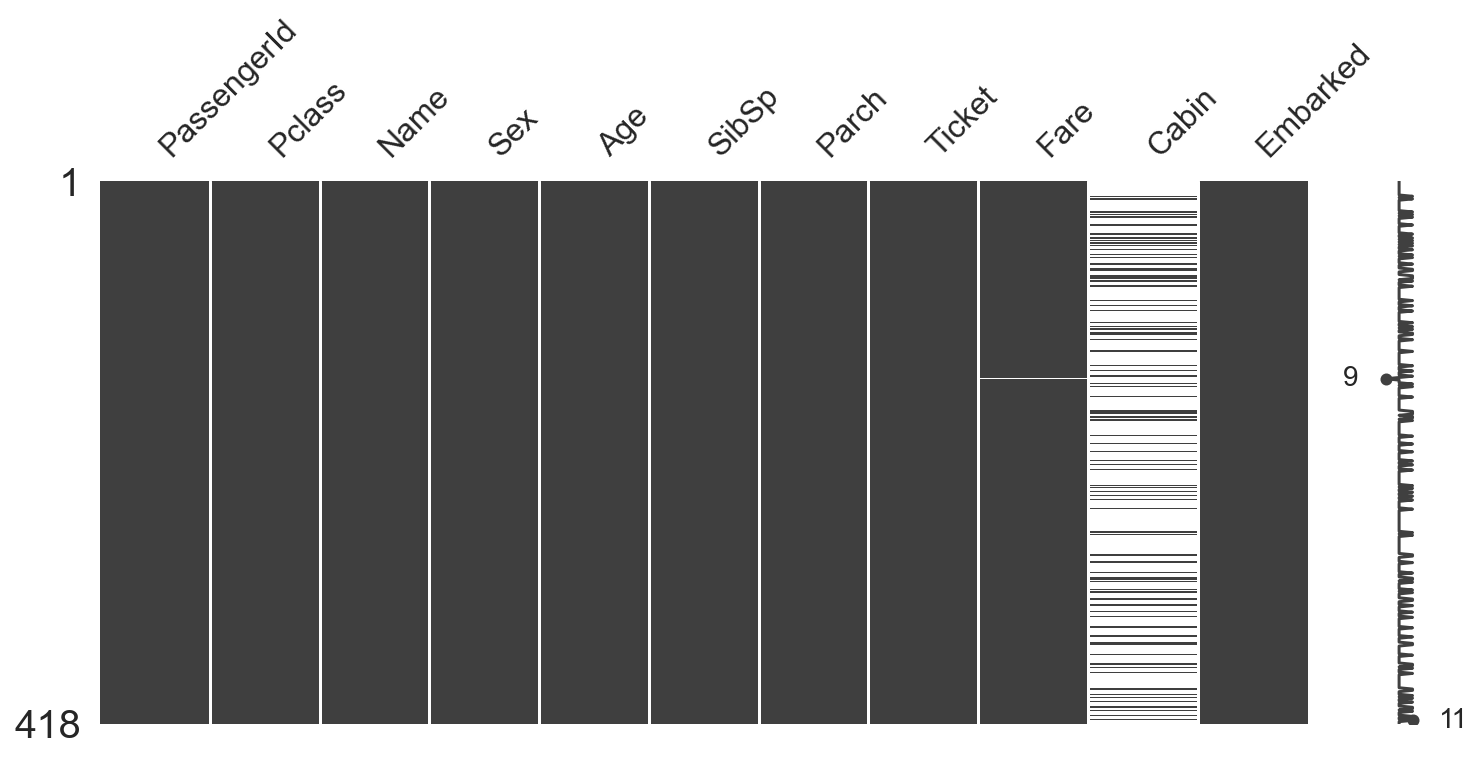

In [17]:
import missingno as msno
msno.matrix(test_df,figsize=(12,5))

In [18]:
submission.to_csv('data/submission.csv',index=False)